In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np


In [4]:
excel_file_path = 'Data/IPCH.xlsx'
sheet_name = 'Sheet 1'
skip_rows = 8  # Skip the first 8 rows (start from the 9th row)

# Read the specific sheet from the Excel file, skipping the specified rows
data = pd.read_excel(excel_file_path, sheet_name=sheet_name, skiprows=skip_rows)

df = data.iloc[1:-6]

# Delete rows where the first column starts with "Euro"
df = df[~df.iloc[:, 0].str.startswith("Euro")]

# Replace ":" with NaN in the entire DataFrame
df.replace(":", np.nan, inplace=True)

# Filter and keep only columns that do not start with "Unnamed"
data = df.loc[:, ~df.columns.str.startswith('Unnamed')]



/opt/mamba/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:

# STEP 1 #
# Make polygon from bbox coordinates https://stackoverflow.com/a/68741143/18253502
def make_bbox(long0, lat0, long1, lat1):
    return Polygon([[long0, lat0],
                    [long1,lat0],
                    [long1,lat1],
                    [long0, lat1]])

# Coords covering Europe & Russia made with http://bboxfinder.com
#bbox = make_bbox(-36.386719,29.228890,60.292969,74.543330)
bbox = make_bbox(-32.800788,33.886212,35.324212,71.763749)



# STEP 2 #
# Convert to gdf
bbox_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry = [bbox])

# STEP 3 #
# Load europe
europe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = europe[europe.continent == 'Europe']

# Use bbox as clipping border for Europe
europe = europe.overlay(bbox_gdf, how="intersection")
merged_data = europe.merge(data, how='left', left_on='name', right_on='TIME')

/tmp/ipykernel_235/868356610.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  europe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [142]:
#merged_data

/tmp/ipykernel_235/3589480183.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data[date]):


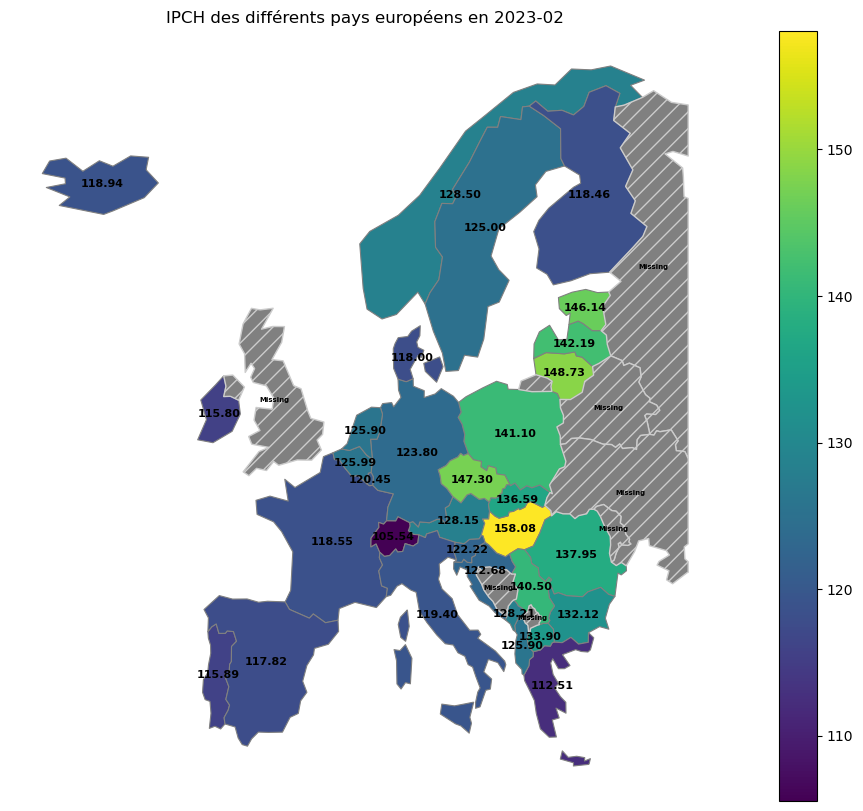

In [20]:
date = '2023-02'
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column=date, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)
merged_data[merged_data[date].isna()].plot(ax=ax, color='gray', hatch='//', edgecolor='0.8')
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data[date]):
    if np.isnan(label):
        ax.text(x, y, 'Missing', fontsize=5, ha='center', va='center', color='black', fontweight='bold')
    else:
        ax.text(x, y, f'{label:.2f}', fontsize=8, ha='center', va='center', color='black', fontweight='bold')
ax.set_title(f'IPCH des différents pays européens en {date}')
ax.set_axis_off()
legend = ax.get_legend()
legend
plt.show()


In [10]:
merged_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,TIME,1996-01,1996-02,1996-03,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
0,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((35.02218 51.20757, 34.22482 51...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5347896.0,Europe,Norway,NOR,403336,"POLYGON ((29.39955 69.15692, 28.59193 69.06478...",Norway,69.20,69.30,69.50,...,128.50,129.70,131.20,131.80,132.70,133.10,131.80,131.60,133.10,NaN
2,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((9.39000 43.00998, 9.56002 42.1...",France,74.13,74.42,74.90,...,118.55,119.76,120.55,120.46,120.71,120.77,122.10,121.40,121.61,121.27
3,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.46827 59.43239, 12.30037 60.11793...",Sweden,75.41,75.60,76.14,...,125.00,125.57,125.82,125.91,127.17,126.93,126.72,127.19,127.29,NaN
4,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((29.22951 55.91834, 29.37157 55.67009...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.41206 52.28869, 32.71576 52.23847...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.52754 53.47012, 23.80493 53.08973...",Poland,43.00,43.60,44.30,...,141.10,142.70,143.80,144.10,144.20,143.80,143.90,143.70,144.20,NaN
7,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.90375 47.71487, 16.34058 47.71290...",Austria,71.34,71.55,71.77,...,128.15,128.88,129.88,130.06,130.42,130.17,130.59,131.75,132.24,132.48
8,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.64082 48.15024, 22.71053 47.88219...",Hungary,29.31,30.01,30.48,...,158.08,159.42,160.57,159.99,160.55,161.12,162.37,162.49,162.10,NaN
9,2657637.0,Europe,Moldova,MDA,11968,"POLYGON ((26.85782 48.36821, 27.52254 48.46712...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data.columns

Index(['TIME', '1996-01', '1996-02', '1996-03', '1996-04', '1996-05',
       '1996-06', '1996-07', '1996-08', '1996-09',
       ...
       '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
       '2023-08', '2023-09', '2023-10', '2023-11'],
      dtype='object', length=336)